In [62]:
import glob
import os
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Function to recursively get all .csv files in a directory
def get_csv_files_recursive(directory_path, exclude_dirs=[]):
    csv_files = []
    for root, dirs, files in os.walk(directory_path):
        # Exclude specific directories
        dirs[:] = [d for d in dirs if d not in exclude_dirs]

        for file in files:
            if file.endswith(".csv"):
                csv_files.append(os.path.join(root, file))
    return csv_files

# Directory path where your CSV files are located
directory_path = "/content/drive/MyDrive/Share/r6.2/r6.2/r6.2/"

# Directories to exclude (if any)
exclude_dirs = []

# Get list of CSV files
csv_files = get_csv_files_recursive(directory_path, exclude_dirs)

# Print the list of CSV files found
print("CSV files found:", csv_files)

# Load df_combined.csv
df_device_file_http_user_features = [file for file in csv_files if 'email_logo_device_http_user_merged_data.csv' in file][0]  # Assuming 'df_combined.csv' is unique

# Load a sample of 50% of the dataset
df = pd.read_csv(df_device_file_http_user_features)

print(df.shape)
print(df.info())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CSV files found: ['/content/drive/MyDrive/Share/r6.2/r6.2/r6.2/psychometric.csv', '/content/drive/MyDrive/Share/r6.2/r6.2/r6.2/logon.csv', '/content/drive/MyDrive/Share/r6.2/r6.2/r6.2/decoy_file.csv', '/content/drive/MyDrive/Share/r6.2/r6.2/r6.2/device.csv', '/content/drive/MyDrive/Share/r6.2/r6.2/r6.2/file.csv', '/content/drive/MyDrive/Share/r6.2/r6.2/r6.2/Newprocessed_logon.csv', '/content/drive/MyDrive/Share/r6.2/r6.2/r6.2/user.csv', '/content/drive/MyDrive/Share/r6.2/r6.2/r6.2/insiders.csv', '/content/drive/MyDrive/Share/r6.2/r6.2/r6.2/df_combined.csv', '/content/drive/MyDrive/Share/r6.2/r6.2/r6.2/df_http_sample.csv', '/content/drive/MyDrive/Share/r6.2/r6.2/r6.2/df_device_file_http_user_features.csv', '/content/drive/MyDrive/Share/r6.2/r6.2/r6.2/merged_sample_http_device_file_user.csv', '/content/drive/MyDrive/Share/r6.2/r6.2/r6.2/final_aggregated_df.csv'

In [2]:
print(df.shape);df.info()

(4000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user                     4000 non-null   object
 1   wikileaks_flag           4000 non-null   int64 
 2   assange_flag             4000 non-null   int64 
 3   keylogger_flag           4000 non-null   int64 
 4   high_quick_session_flag  4000 non-null   int64 
 5   more_than_3_pc           4000 non-null   int64 
 6   high_after_hours_logon   4000 non-null   int64 
 7   high_weekend_logon       4000 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 250.1+ KB


In [3]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 83.4 MB/s eta 0:0

In [4]:
print(df.head())

      user  wikileaks_flag  assange_flag  keylogger_flag  \
0  AAC0610               0             0               0   
1  AAF0819               0             0               0   
2  AAP0352               0             0               0   
3  AAP1919               0             0               0   
4  ABD3426               0             0               0   

   high_quick_session_flag  more_than_3_pc  high_after_hours_logon  \
0                        0               0                       0   
1                        0               0                       0   
2                        0               0                       0   
3                        1               0                       0   
4                        1               0                       0   

   high_weekend_logon  
0                   1  
1                   0  
2                   0  
3                   0  
4                   1  


In [5]:
from pycaret import *
import pandas as pd
from pycaret.anomaly import *


In [6]:
# Initialize the PyCaret environment for anomaly detection using the first chunk of data
anomaly_setup = setup(data=df, session_id=1, use_gpu=True)

,Description,Value
0,Session id,1
1,Original data shape,"(4000, 8)"
2,Transformed data shape,"(4000, 4007)"
3,Numeric features,7
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [7]:
lof = create_model('lof')
iforest = create_model('iforest')
ocsvm = create_model('svm')


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
lof_df = assign_model(lof)
iforest_df = assign_model(iforest)
ocsvm_df = assign_model(ocsvm)

In [9]:
print(lof_df.head())
print(iforest_df.head())
print(ocsvm_df.head())

      user  wikileaks_flag  assange_flag  keylogger_flag  \
0  AAC0610               0             0               0   
1  AAF0819               0             0               0   
2  AAP0352               0             0               0   
3  AAP1919               0             0               0   
4  ABD3426               0             0               0   

   high_quick_session_flag  more_than_3_pc  high_after_hours_logon  \
0                        0               0                       0   
1                        0               0                       0   
2                        0               0                       0   
3                        1               0                       0   
4                        1               0                       0   

   high_weekend_logon  Anomaly  Anomaly_Score  
0                   1        0            1.0  
1                   0        0            1.0  
2                   0        0            1.0  
3                   0     

In [ ]:
save_model(lof_df, 'lof_results.csv')
save_model(iforest_df, 'iforest_results.csv')
save_model(ocsvm_df, 'ocsvm_results.csv')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['wikileaks_flag', 'assange_flag',
                                              'keylogger_flag',
                                              'high_quick_session_flag',
                                              'more_than_3_pc',
                                              'high_after_hours_logon',
                                              'high_weekend_logon'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['user'],
                                     transformer=Simpl...
 3998  MWB0710               0             0               0   
 3999  AAF3937               0             0               0   
 
       high_quick_session_flag  more_than_3_pc  high_after_hours_logon  \
 0                           0               0                

In [10]:
pip install pycaret[analysis]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 59.8 MB/s eta 0:0

In [ ]:
evaluate_model(lof)
evaluate_model(iforest)
evaluate_model(ocsvm)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
plot_model(lof)
plot_model(iforest)
plot_model(ocsvm)

In [11]:
# Initialize Anomaly Setup
anomaly_setup = setup(data=df, session_id=1, use_gpu=True)

# Create LOF model
lof_model = create_model('lof')

# Create Isolation Forest model
iso_forest_model = create_model('iforest')

# Create One-Class SVM model
ocsvm_model = create_model('svm')

# Assign anomalies to the data using all three models
lof_df = assign_model(lof_model)
iso_forest_df = assign_model(iso_forest_model)
ocsvm_df = assign_model(ocsvm_model)

# Count the number of anomalies vs normal users for LOF
lof_value_counts = lof_df['Anomaly'].value_counts()

# Count the number of anomalies vs normal users for Isolation Forest
iso_forest_value_counts = iso_forest_df['Anomaly'].value_counts()

# Count the number of anomalies vs normal users for One-Class SVM
ocsvm_value_counts = ocsvm_df['Anomaly'].value_counts()

# Print the results
print("LOF Anomalies vs Normal Users:")
print(lof_value_counts)

print("\nIsolation Forest Anomalies vs Normal Users:")
print(iso_forest_value_counts)

print("\nOne-Class SVM Anomalies vs Normal Users:")
print(ocsvm_value_counts)


,Description,Value
0,Session id,1
1,Original data shape,"(4000, 8)"
2,Transformed data shape,"(4000, 4007)"
3,Numeric features,7
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

LOF Anomalies vs Normal Users:
0    3977
1      23
Name: Anomaly, dtype: int64

Isolation Forest Anomalies vs Normal Users:
0    3805
1     195
Name: Anomaly, dtype: int64

One-Class SVM Anomalies vs Normal Users:
0    3858
1     142
Name: Anomaly, dtype: int64


In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [13]:
fpr_lof, tpr_lof, _ = roc_curve(lof_df['Anomaly'], lof_df['Anomaly_Score'])
roc_auc_lof = auc(fpr_lof, tpr_lof)

fpr_iforest, tpr_iforest, _ = roc_curve(iso_forest_df['Anomaly'], iso_forest_df['Anomaly_Score'])
roc_auc_iforest = auc(fpr_iforest, tpr_iforest)

fpr_ocsvm, tpr_ocsvm, _ = roc_curve(ocsvm_df['Anomaly'], ocsvm_df['Anomaly_Score'])
roc_auc_ocsvm = auc(fpr_ocsvm, tpr_ocsvm)


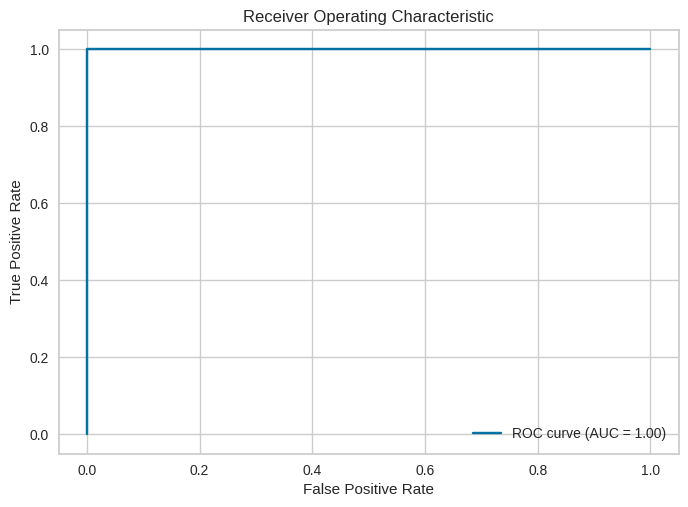

In [14]:
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the DataFrame
df = pd.read_csv('/content/drive/MyDrive/Share/r6.2/r6.2/r6.2/iforest_anomaly_scores.csv')

# Calculate ROC and AUC
y_true = df['Anomaly']
y_score = df['Anomaly_Score']
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = roc_auc_score(y_true, y_score)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [15]:
# Count the number of anomalous users
anomalous_count = df[df['Anomaly'] == 1].shape[0]
print(f"The number of anomalous users is {anomalous_count}.")


The number of anomalous users is 195.


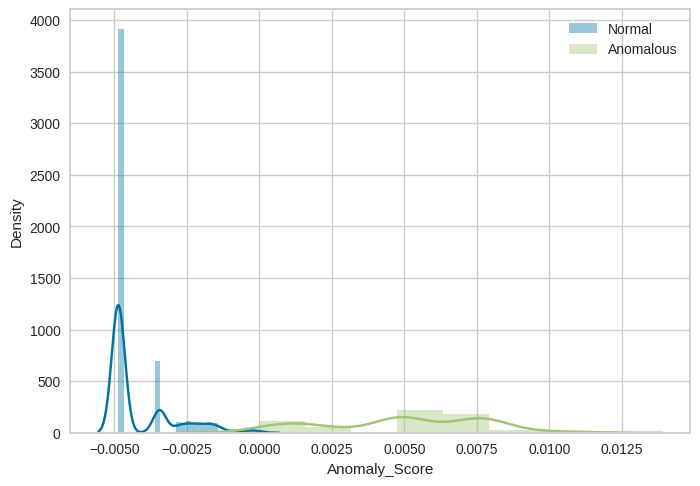

In [16]:
import seaborn as sns
sns.distplot(df[df['Anomaly']==0]['Anomaly_Score'], label='Normal')
sns.distplot(df[df['Anomaly']==1]['Anomaly_Score'], label='Anomalous')
plt.legend()
plt.show()


In [17]:
# Inspect the range of Anomaly_Scores for both classes
print("Anomaly Score range for Anomalous instances:")
print(df[df['Anomaly'] == 1]['Anomaly_Score'].describe())

print("\nAnomaly Score range for Non-Anomalous instances:")
print(df[df['Anomaly'] == 0]['Anomaly_Score'].describe())

Anomaly Score range for Anomalous instances:
count    1.950000e+02
mean     4.968619e-03
std      2.701178e-03
min      4.661544e-08
25%      2.451603e-03
50%      5.008561e-03
75%      7.501606e-03
max      1.106605e-02
Name: Anomaly_Score, dtype: float64

Anomaly Score range for Non-Anomalous instances:
count    3805.000000
mean       -0.004174
std         0.001179
min        -0.004861
25%        -0.004861
50%        -0.004861
75%        -0.003437
max        -0.000000
Name: Anomaly_Score, dtype: float64


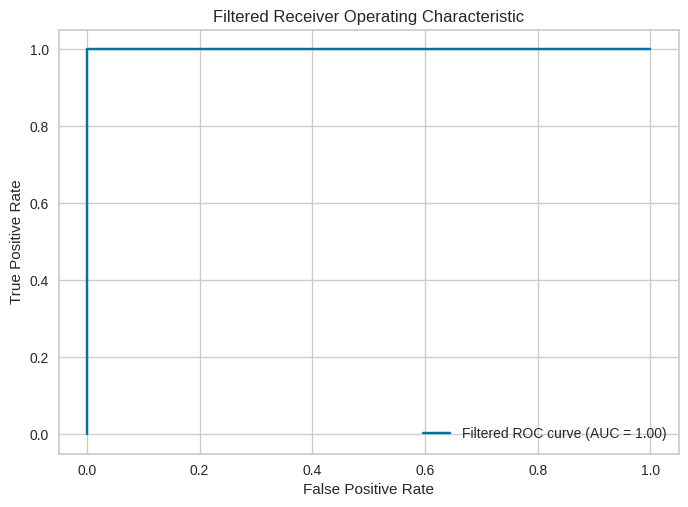

In [18]:
# Filter the DataFrame to only include rows within the range of interest for anomaly scores
df_filtered = df[(df['Anomaly_Score'] >= -0.0050) & (df['Anomaly_Score'] <= 0.0125)]

# Calculate ROC and AUC for the filtered DataFrame
y_true_filtered = df_filtered['Anomaly']
y_score_filtered = df_filtered['Anomaly_Score']
fpr_filtered, tpr_filtered, _ = roc_curve(y_true_filtered, y_score_filtered)
roc_auc_filtered = roc_auc_score(y_true_filtered, y_score_filtered)

# Plot ROC Curve for the filtered DataFrame
plt.figure()
plt.plot(fpr_filtered, tpr_filtered, label=f'Filtered ROC curve (AUC = {roc_auc_filtered:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Filtered Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


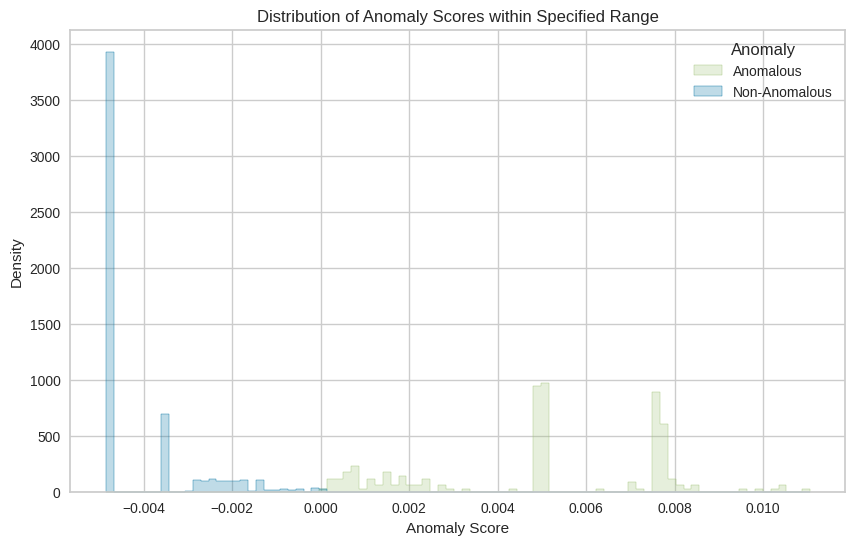

In [19]:
import seaborn as sns

# Filter the DataFrame to only include rows within the range of interest for anomaly scores
df_filtered = df[(df['Anomaly_Score'] >= -0.0050) & (df['Anomaly_Score'] <= 0.0125)]

# Plot the distribution of anomaly scores for both anomalous and non-anomalous users
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered, x='Anomaly_Score', hue='Anomaly', element='step', stat='density', common_norm=False)
plt.title('Distribution of Anomaly Scores within Specified Range')
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.legend(title='Anomaly', labels=['Anomalous', 'Non-Anomalous'])
plt.show()


In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the DataFrame for OCSVM
df_ocsvm = pd.read_csv('/content/drive/MyDrive/Share/r6.2/r6.2/r6.2/ocsvm_anomaly_scores.csv')

print(df_ocsvm.head())


      user  wikileaks_flag  assange_flag  keylogger_flag  \
0  AAC0610               0             0               0   
1  AAF0819               0             0               0   
2  AAP0352               0             0               0   
3  AAP1919               0             0               0   
4  ABD3426               0             0               0   

   high_quick_session_flag  more_than_3_pc  high_after_hours_logon  \
0                        0               0                       0   
1                        0               0                       0   
2                        0               0                       0   
3                        1               0                       0   
4                        1               0                       0   

   high_weekend_logon  Anomaly  Anomaly_Score  
0                   1        0       0.169580  
1                   0        0      -0.000253  
2                   0        0      -0.000253  
3                   0     

In [21]:
# Check the number of each class in the filtered DataFrame
class_distribution = df_ocsvm['Anomaly'].value_counts()
print(f"Class distribution in the filtered DataFrame: \n{class_distribution}")


Class distribution in the filtered DataFrame: 
0    3858
1     142
Name: Anomaly, dtype: int64


In [22]:
# Inspect the range of Anomaly_Scores for both classes
print("Anomaly Score range for Anomalous instances:")
print(df_ocsvm[df_ocsvm['Anomaly'] == 1]['Anomaly_Score'].describe())

print("\nAnomaly Score range for Non-Anomalous instances:")
print(df_ocsvm[df_ocsvm['Anomaly'] == 0]['Anomaly_Score'].describe())


Anomaly Score range for Anomalous instances:
count     142.000000
mean       14.865935
std       167.504299
min         0.428908
25%         0.428908
50%         0.598698
75%         0.771965
max      1996.610607
Name: Anomaly_Score, dtype: float64

Anomaly Score range for Non-Anomalous instances:
count    3858.000000
mean        0.052442
std         0.097493
min        -0.000253
25%         0.000246
50%         0.000246
75%         0.000246
max         0.342887
Name: Anomaly_Score, dtype: float64


In [23]:
# Filter the DataFrame to include rows within a new range of interest for Anomaly_Scores
new_lower_bound = -0.001
new_upper_bound = 2

df_filtered_ocsvm = df_ocsvm[(df_ocsvm['Anomaly_Score'] >= new_lower_bound) & (df_ocsvm['Anomaly_Score'] <= new_upper_bound)]

# Check the class distribution in the filtered DataFrame
class_distribution = df_filtered_ocsvm['Anomaly'].value_counts()
print(f"Class distribution in the filtered DataFrame: \n{class_distribution}")


Class distribution in the filtered DataFrame: 
0    3858
1     140
Name: Anomaly, dtype: int64


Class distribution in the filtered DataFrame: 
0    3858
1     140
Name: Anomaly, dtype: int64


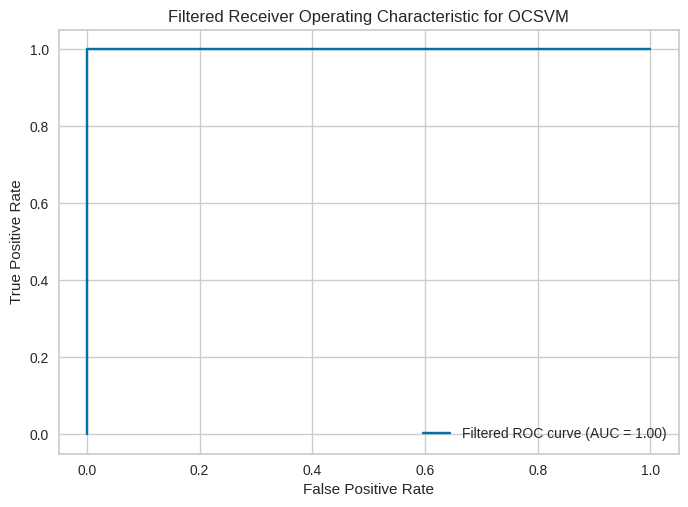

In [24]:
# Import necessary libraries
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Filter the DataFrame to include rows within the new range of interest for Anomaly_Scores
new_lower_bound = -0.001
new_upper_bound = 2
df_filtered_ocsvm = df_ocsvm[(df_ocsvm['Anomaly_Score'] >= new_lower_bound) & (df_ocsvm['Anomaly_Score'] <= new_upper_bound)]

# Check the class distribution in the filtered DataFrame
class_distribution = df_filtered_ocsvm['Anomaly'].value_counts()
print(f"Class distribution in the filtered DataFrame: \n{class_distribution}")

# Check if both classes are present
if len(class_distribution) > 1:
    # Calculate ROC and AUC for the filtered DataFrame
    y_true_filtered = df_filtered_ocsvm['Anomaly']
    y_score_filtered = df_filtered_ocsvm['Anomaly_Score']
    fpr_filtered, tpr_filtered, _ = roc_curve(y_true_filtered, y_score_filtered)
    roc_auc_filtered = roc_auc_score(y_true_filtered, y_score_filtered)

    # Plot ROC Curve for the filtered DataFrame
    plt.figure()
    plt.plot(fpr_filtered, tpr_filtered, label=f'Filtered ROC curve (AUC = {roc_auc_filtered:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Filtered Receiver Operating Characteristic for OCSVM')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("Cannot calculate ROC and AUC with only one class present in the data.")

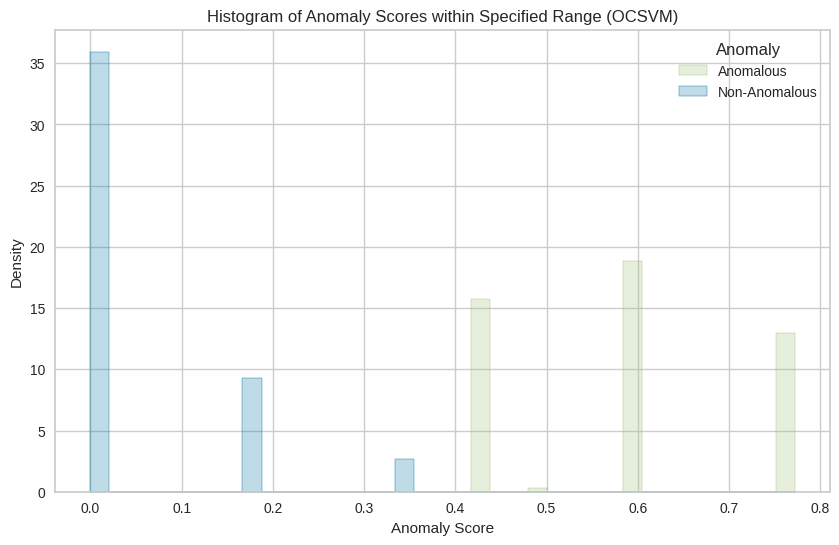

In [25]:
import seaborn as sns

# Histplot
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_ocsvm, x='Anomaly_Score', hue='Anomaly', element='step', stat='density', common_norm=False)
plt.title('Histogram of Anomaly Scores within Specified Range (OCSVM)')
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.legend(title='Anomaly', labels=['Anomalous', 'Non-Anomalous'])
plt.show()

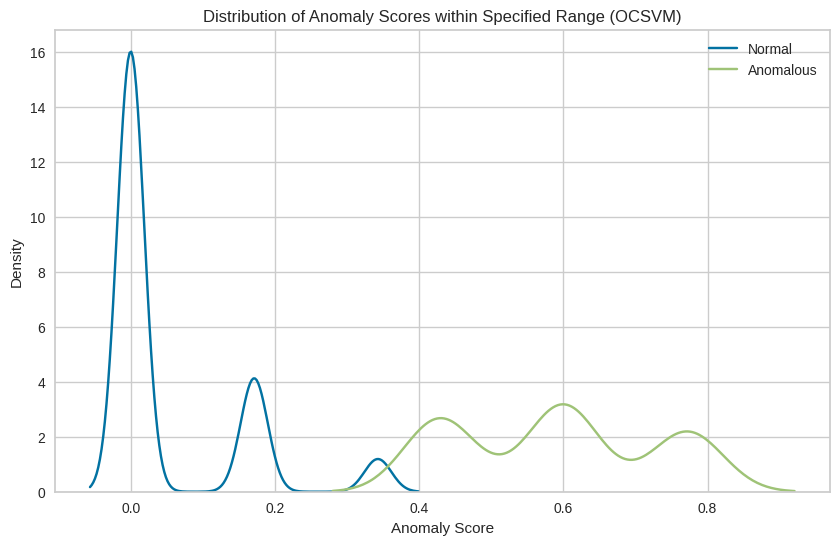

In [26]:
# Distplot
plt.figure(figsize=(10, 6))
sns.distplot(df_filtered_ocsvm[df_filtered_ocsvm['Anomaly']==0]['Anomaly_Score'], label='Normal', hist=False)
sns.distplot(df_filtered_ocsvm[df_filtered_ocsvm['Anomaly']==1]['Anomaly_Score'], label='Anomalous', hist=False)
plt.title('Distribution of Anomaly Scores within Specified Range (OCSVM)')
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.legend()
plt.show()

In [27]:
# Import necessary libraries
import pandas as pd

# Load the DataFrame for LOF
df_lof = pd.read_csv('/content/drive/MyDrive/Share/r6.2/r6.2/r6.2/lof_anomaly_scores.csv')

# Display summary statistics for Anomaly_Score
print("Summary statistics for Anomaly_Score:")
print(df_lof['Anomaly_Score'].describe())


Summary statistics for Anomaly_Score:
count    4000.000000
mean        1.039549
std         2.420339
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       154.003247
Name: Anomaly_Score, dtype: float64


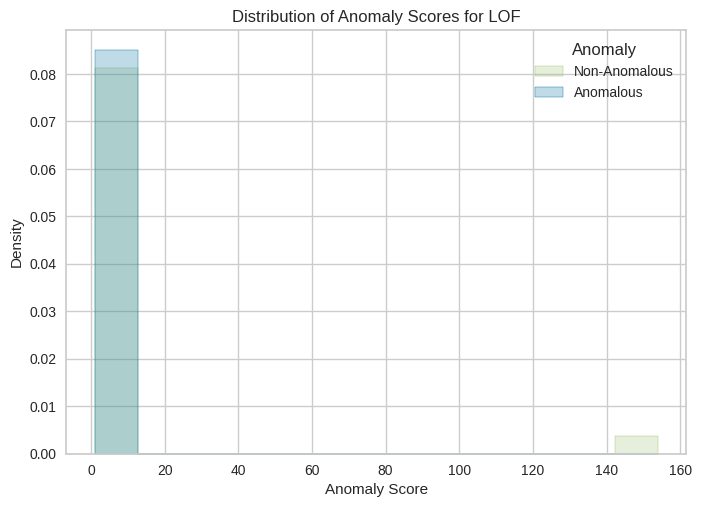

In [28]:
# Import seaborn for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of anomaly scores
sns.histplot(df_lof, x='Anomaly_Score', hue='Anomaly', element='step', stat='density', common_norm=False)
plt.title('Distribution of Anomaly Scores for LOF')
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.legend(title='Anomaly', labels=['Non-Anomalous', 'Anomalous'])
plt.show()


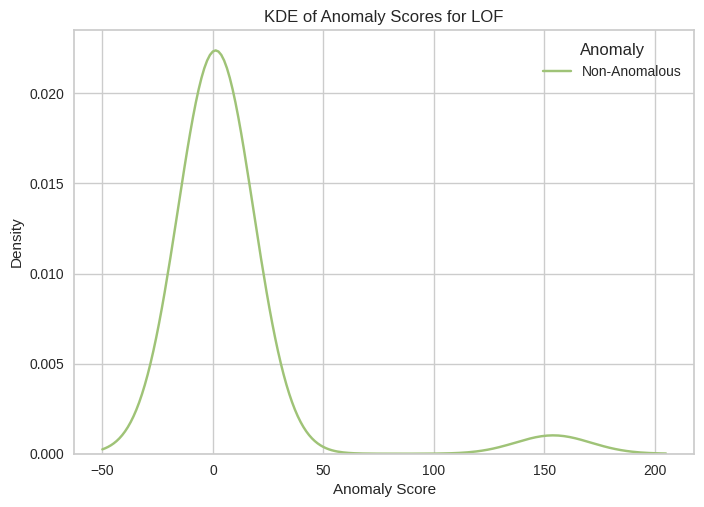

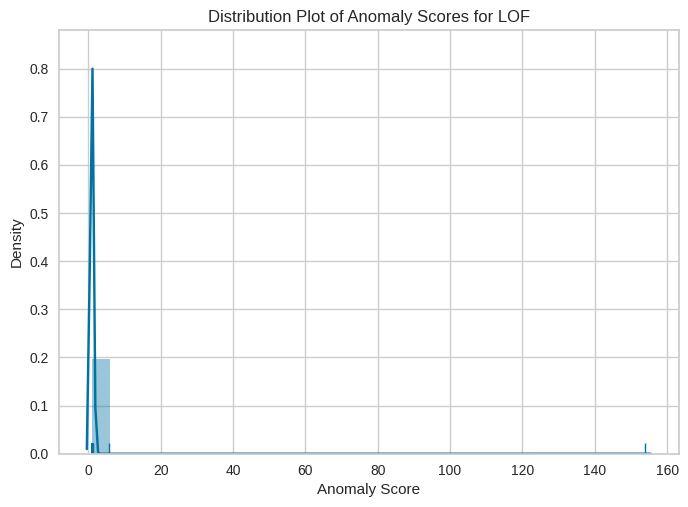

In [29]:
# Plot the distribution of anomaly scores using a KDE plot
sns.kdeplot(data=df_lof, x='Anomaly_Score', hue='Anomaly', common_norm=False)
plt.title('KDE of Anomaly Scores for LOF')
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.legend(title='Anomaly', labels=['Non-Anomalous', 'Anomalous'])
plt.show()

# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the distplot
sns.distplot(df_lof['Anomaly_Score'], bins=30, kde=True, rug=True)
plt.title('Distribution Plot of Anomaly Scores for LOF')
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.show()


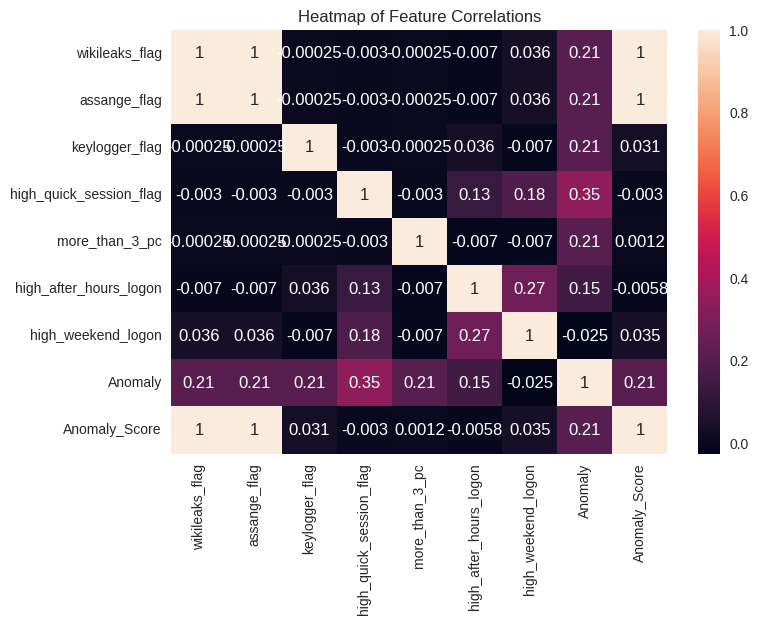

In [30]:
correlation_matrix = df_lof.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Heatmap of Feature Correlations')
plt.show()



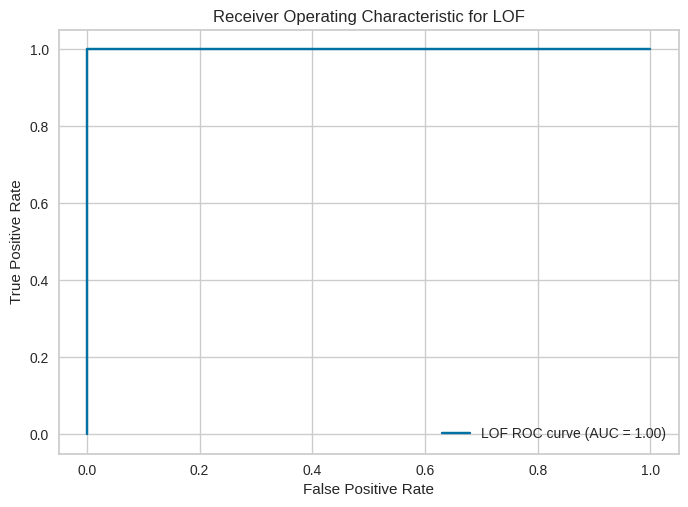

In [31]:
# Import necessary libraries for ROC and AUC
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC and AUC
y_true_lof = df_lof['Anomaly']
y_score_lof = df_lof['Anomaly_Score']
fpr_lof, tpr_lof, _ = roc_curve(y_true_lof, y_score_lof)
roc_auc_lof = roc_auc_score(y_true_lof, y_score_lof)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_lof, tpr_lof, label=f'LOF ROC curve (AUC = {roc_auc_lof:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LOF')
plt.legend(loc='lower right')
plt.show()


Summary statistics for Anomaly_Score:
count    4000.000000
mean        1.039549
std         2.420339
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       154.003247
Name: Anomaly_Score, dtype: float64


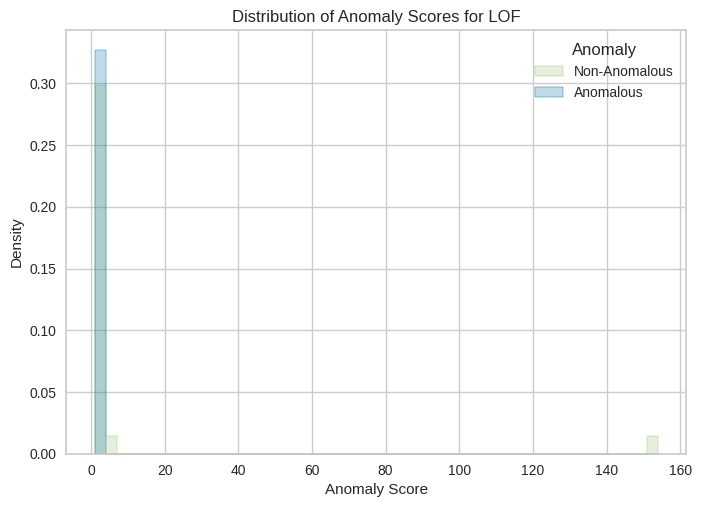

In [32]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the DataFrame for LOF
df_lof = pd.read_csv('/content/drive/MyDrive/Share/r6.2/r6.2/r6.2/lof_anomaly_scores.csv')

# Display summary statistics for Anomaly_Score
print("Summary statistics for Anomaly_Score:")
print(df_lof['Anomaly_Score'].describe())

# Plot the distribution of anomaly scores
sns.histplot(df_lof, x='Anomaly_Score', hue='Anomaly', element='step', stat='density', common_norm=False, bins=50)
plt.title('Distribution of Anomaly Scores for LOF')
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.legend(title='Anomaly', labels=['Non-Anomalous', 'Anomalous'])
plt.show()


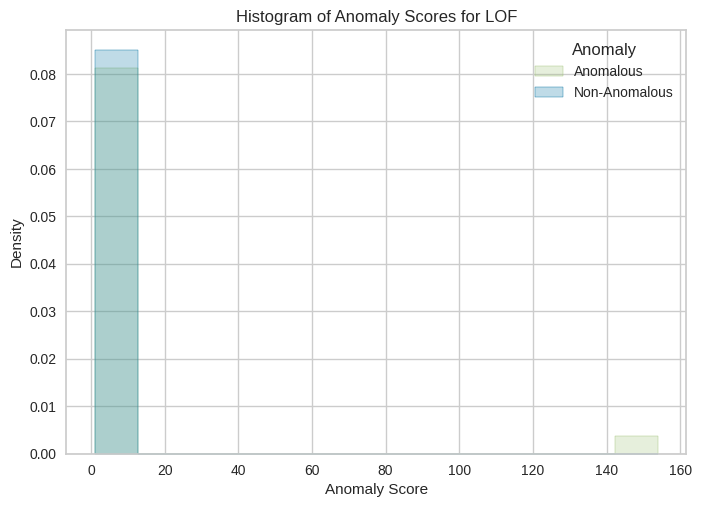

In [45]:
# Plot the distribution of anomaly scores using a histogram
sns.histplot(df_lof, x='Anomaly_Score', hue='Anomaly', element='step', stat='density', common_norm=False)
plt.title('Histogram of Anomaly Scores for LOF')
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.legend(title='Anomaly', labels=['Anomalous', 'Non-Anomalous',])
plt.show()


Class distribution in the filtered DataFrame: 
0    3977
1      22
Name: Anomaly, dtype: int64


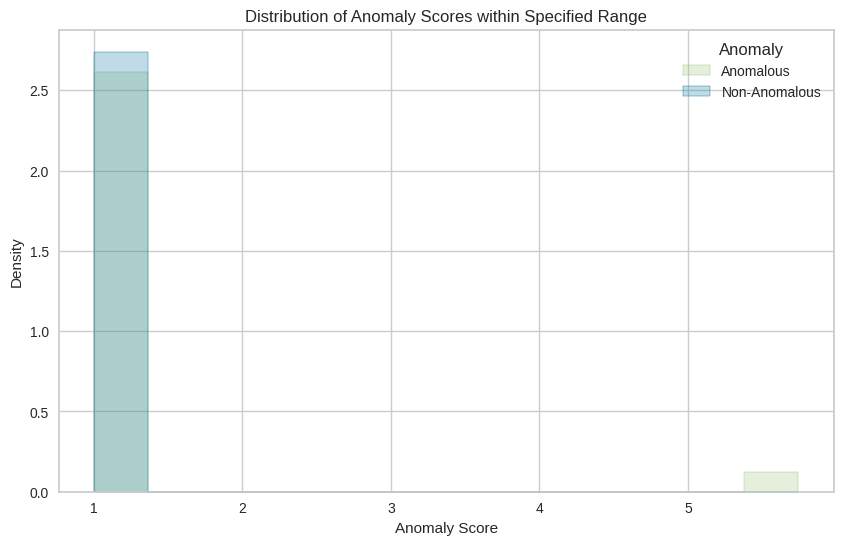

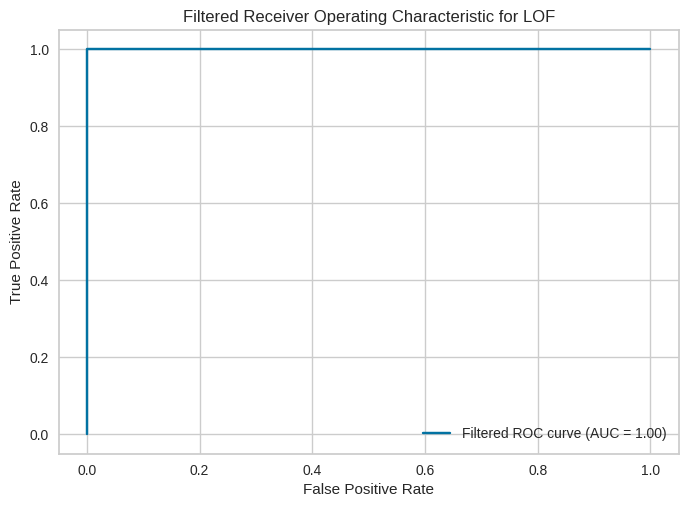

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter the DataFrame to include rows within the specified range for Anomaly_Scores
df_filtered_lof = df_lof[(df_lof['Anomaly_Score'] >= 1) & (df_lof['Anomaly_Score'] <= 20)]

# Check the class distribution in the filtered DataFrame
class_distribution = df_filtered_lof['Anomaly'].value_counts()
print(f"Class distribution in the filtered DataFrame: \n{class_distribution}")

# Plot the histogram and density plot
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_lof, x='Anomaly_Score', hue='Anomaly', element='step', stat='density', common_norm=False)
plt.title('Distribution of Anomaly Scores within Specified Range')
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.legend(title='Anomaly', labels=['Anomalous', 'Non-Anomalous'])
plt.show()

# Calculate ROC and AUC for the filtered DataFrame
y_true_filtered = df_filtered_lof['Anomaly']
y_score_filtered = df_filtered_lof['Anomaly_Score']
fpr_filtered, tpr_filtered, _ = roc_curve(y_true_filtered, y_score_filtered)
roc_auc_filtered = roc_auc_score(y_true_filtered, y_score_filtered)

# Plot ROC Curve for the filtered DataFrame
plt.figure()
plt.plot(fpr_filtered, tpr_filtered, label=f'Filtered ROC curve (AUC = {roc_auc_filtered:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Filtered Receiver Operating Characteristic for LOF')
plt.legend(loc='lower right')
plt.show()


Class distribution in the filtered DataFrame for One-Class SVM: 
0    2964
1     142
Name: Anomaly, dtype: int64


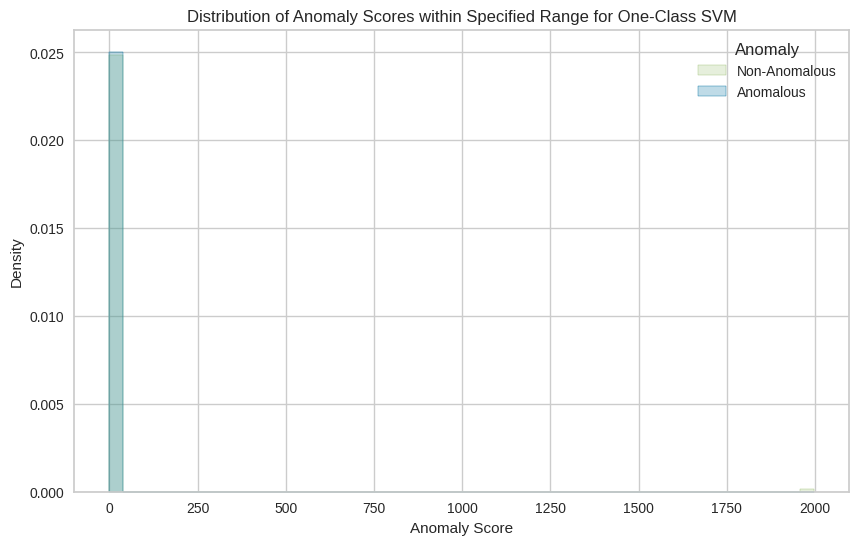

In [35]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include rows within a specified range for Anomaly_Scores
# You can adjust the range as needed
df_filtered_ocsvm = ocsvm_df[(ocsvm_df['Anomaly_Score'] >= 0) & (ocsvm_df['Anomaly_Score'] <= 2000)]

# Check the class distribution in the filtered DataFrame
class_distribution_ocsvm = df_filtered_ocsvm['Anomaly'].value_counts()
print(f"Class distribution in the filtered DataFrame for One-Class SVM: \n{class_distribution_ocsvm}")

# Plot the histogram and density plot
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_ocsvm, x='Anomaly_Score', hue='Anomaly', element='step', stat='density', common_norm=False, bins=50)
plt.title('Distribution of Anomaly Scores within Specified Range for One-Class SVM')
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.legend(title='Anomaly', labels=['Non-Anomalous', 'Anomalous'])
plt.show()


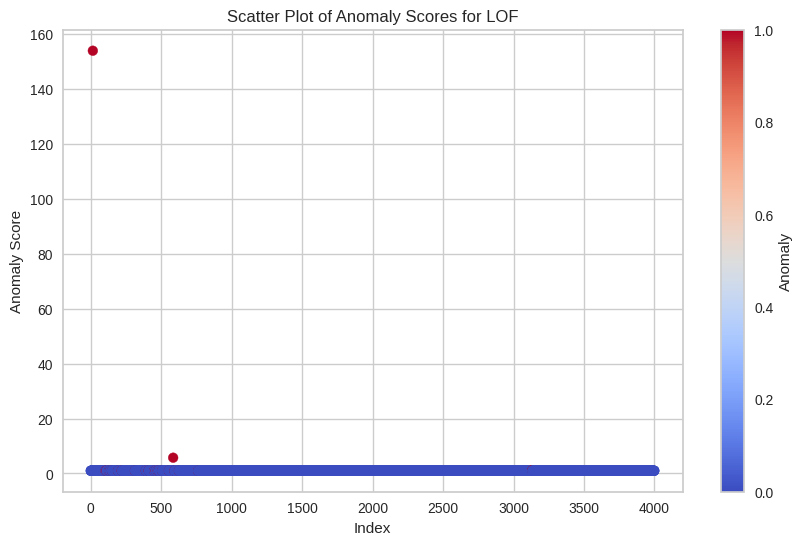

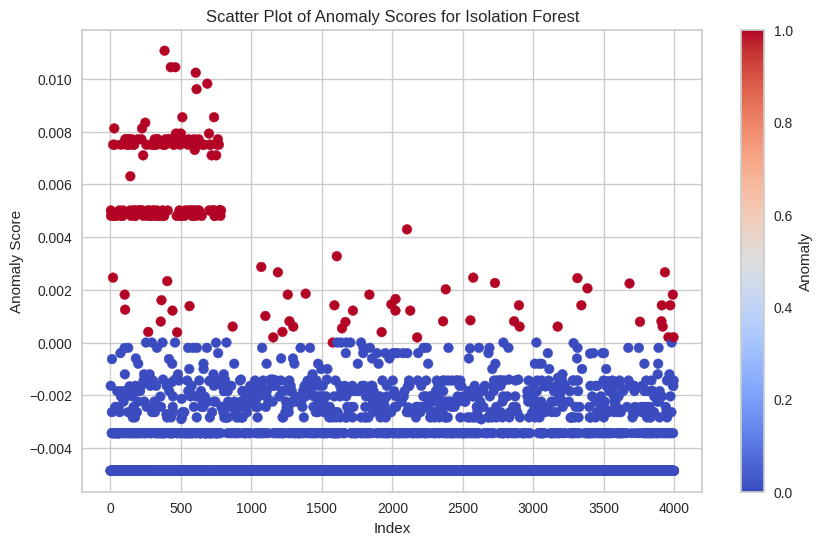

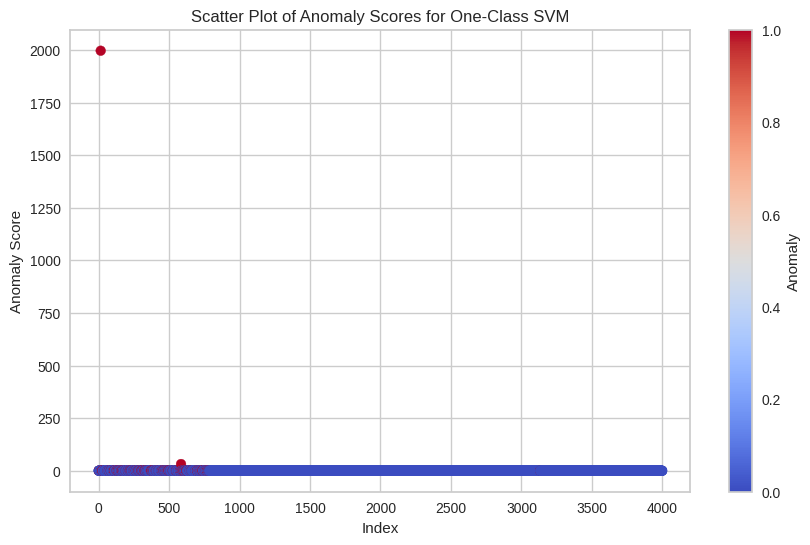

In [36]:
import matplotlib.pyplot as plt

# Scatter plot for LOF
plt.figure(figsize=(10, 6))
plt.scatter(lof_df.index, lof_df['Anomaly_Score'], c=lof_df['Anomaly'], cmap='coolwarm', label='LOF')
plt.title('Scatter Plot of Anomaly Scores for LOF')
plt.xlabel('Index')
plt.ylabel('Anomaly Score')
plt.colorbar().set_label('Anomaly')
plt.show()

# Scatter plot for Isolation Forest
plt.figure(figsize=(10, 6))
plt.scatter(iso_forest_df.index, iso_forest_df['Anomaly_Score'], c=iso_forest_df['Anomaly'], cmap='coolwarm', label='Isolation Forest')
plt.title('Scatter Plot of Anomaly Scores for Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Anomaly Score')
plt.colorbar().set_label('Anomaly')
plt.show()

# Scatter plot for One-Class SVM
plt.figure(figsize=(10, 6))
plt.scatter(ocsvm_df.index, ocsvm_df['Anomaly_Score'], c=ocsvm_df['Anomaly'], cmap='coolwarm', label='One-Class SVM')
plt.title('Scatter Plot of Anomaly Scores for One-Class SVM')
plt.xlabel('Index')
plt.ylabel('Anomaly Score')
plt.colorbar().set_label('Anomaly')
plt.show()


In [37]:
from sklearn.metrics import roc_auc_score

# Calculate AUC for LOF
lof_auc = roc_auc_score(lof_df['Anomaly'], lof_df['Anomaly_Score'])
print(f"AUC for LOF: {lof_auc}")

# Calculate AUC for Isolation Forest
iso_forest_auc = roc_auc_score(iso_forest_df['Anomaly'], iso_forest_df['Anomaly_Score'])
print(f"AUC for Isolation Forest: {iso_forest_auc}")

# Calculate AUC for One-Class SVM
ocsvm_auc = roc_auc_score(ocsvm_df['Anomaly'], ocsvm_df['Anomaly_Score'])
print(f"AUC for One-Class SVM: {ocsvm_auc}")


AUC for LOF: 1.0
AUC for Isolation Forest: 1.0
AUC for One-Class SVM: 0.9999999999999999


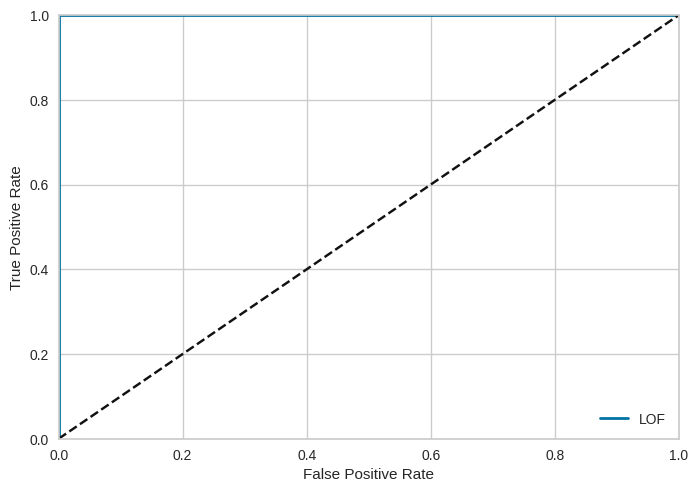

In [38]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

# Calculate ROC curve for LOF
fpr_lof, tpr_lof, thresholds_lof = roc_curve(lof_df['Anomaly'], lof_df['Anomaly_Score'])
plot_roc_curve(fpr_lof, tpr_lof, "LOF")


plt.legend(loc="lower right")
plt.show()


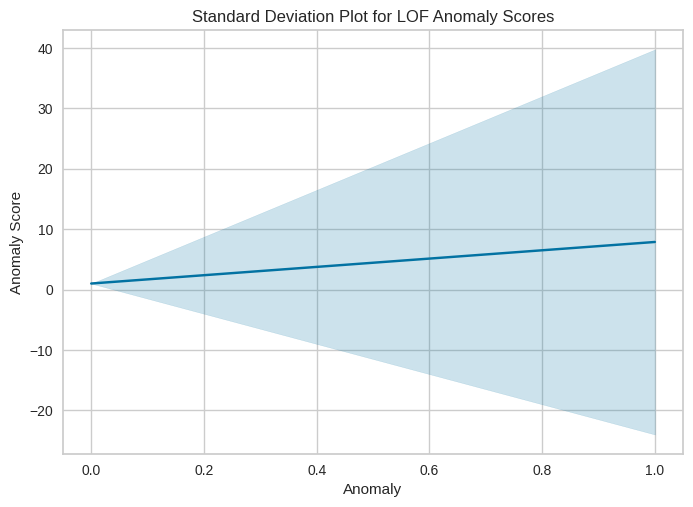

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_lof contains your LOF data and 'Anomaly_Score' is the column of interest
sns.lineplot(x='Anomaly', y='Anomaly_Score', data=df_lof, ci='sd')
plt.title('Standard Deviation Plot for LOF Anomaly Scores')
plt.xlabel('Anomaly')
plt.ylabel('Anomaly Score')
plt.show()


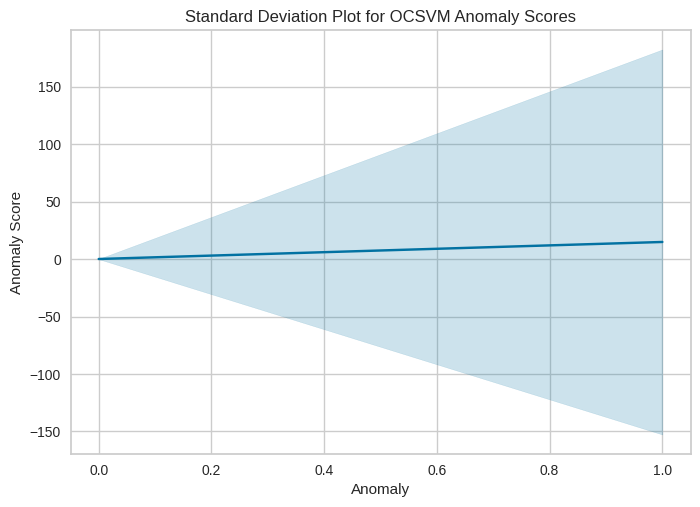

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_lof contains your LOF data and 'Anomaly_Score' is the column of interest
sns.lineplot(x='Anomaly', y='Anomaly_Score', data=ocsvm_df, ci='sd')
plt.title('Standard Deviation Plot for OCSVM Anomaly Scores')
plt.xlabel('Anomaly')
plt.ylabel('Anomaly Score')
plt.show()

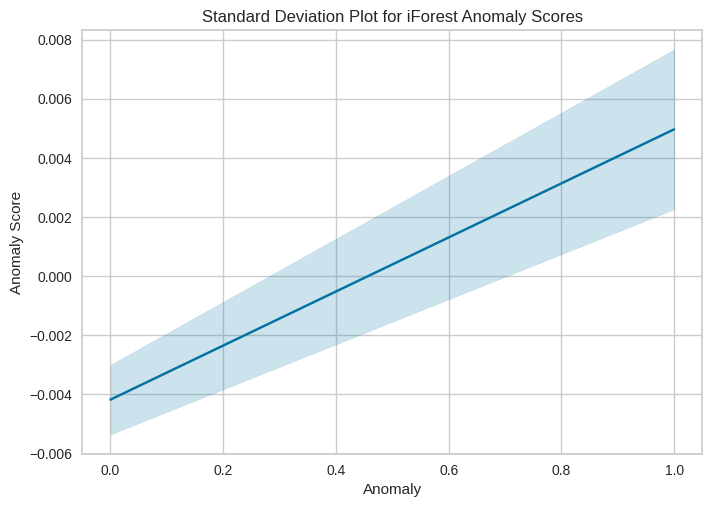

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_lof contains your LOF data and 'Anomaly_Score' is the column of interest
sns.lineplot(x='Anomaly', y='Anomaly_Score', data=iforest_df, ci='sd')
plt.title('Standard Deviation Plot for iForest Anomaly Scores')
plt.xlabel('Anomaly')
plt.ylabel('Anomaly Score')
plt.show()

In [ ]:
'''
******Ground Truth******
r6.1
http,ACM2278,PC-8431,http://wikileaks.org/Julian_Assange/assange/The_Real_Story_About_DTAA/Gur_Erny_Fgbel_Nobhg_QGNN1528513805.php/B7RGYJZC.jpg,WWW Upload,The_Real_Story_About_DTAA,FF-D8
http,ACM2278,PC-8431,http://wikileaks.org/Julian_Assange/assange/The_Real_Story_About_DTAA/Gur_Erny_Fgbel_Nobhg_QGNN1528513805.php/B7RGYJZC.jpg,WWW Upload,The_Real_Story_About_DTAA,FF-D8
http,ACM2278,PC-8431,http://wikileaks.org/Julian_Assange/assange/The_Real_Story_About_DTAA/Gur_Erny_Fgbel_Nobhg_QGNN1528513805.php/7QO6RIRR.txt,WWW Upload,The_Real_Story_About_DTAA,"33-4E-42-56 Samantabhadra (2nd century CE) and Siddhasena Divakara (3rd century CE) further fine-tuned Jain epistemology and logic by expounding on the concepts of anekantavada in proper form and structure. The importance and antiquity of anekantavada are also demonstrated by the fact that it formed the subject matter of Astinasti Pravada, the fourth part of the lost Purva that contained teachings of the {IAST|Tirtha?karas} prior to Mahavira. This ecumenical and irenical attitude, engendered by anekantavada, allowed modern Jain monks such as Vijayadharmasuri to declare: ""I am neither a Jain nor a Buddhist, a Vaisnava nor a Saivite, a Hindu nor a Muslim, but a traveler on the path of peace shown by the supreme soul, the God who is free from passion."" In recent times, Jainism influenced Gandhi, who advocated {IAST|ahi?sa} and satyagraha."
http,ACM2278,PC-8431,http://wikileaks.org/Julian_Assange/assange/The_Real_Story_About_DTAA/Gur_Erny_Fgbel_Nobhg_QGNN1528513805.php/QP8YHH52.zip,WWW Upload,The_Real_Story_About_DTAA,"50-4B-03-04-14 This does not deny the other attributes, qualities, modes and other aspects; they are just irrelevant from a particular perspective. He proclaimed that the duty of every individual is to determine what is personally true and act on that relative perception of truth."
http,ACM2278,PC-8431,http://wikileaks.org/Julian_Assange/assange/The_Real_Story_About_DTAA/Gur_Erny_Fgbel_Nobhg_QGNN1528513805.php/JMR2V1HC.txt,WWW Upload,The_Real_Story_About_DTAA,"30-51-46-4A In response to a friend's query on religious tolerance, he responded in the journal ""Young India - 21 Jan 1926"": The principle of anekantavada is the foundation of many Jain philosophical concepts. All the men claimed to understand and explain the true appearance of the elephant, but could only partly succeed, due to their limited perspectives. Just as a right-acting person respects the life of all beings, so a right-thinking person acknowledges the validity of all judgments."
http,ACM2278,PC-8431,http://wikileaks.org/Julian_Assange/assange/The_Real_Story_About_DTAA/Gur_Erny_Fgbel_Nobhg_QGNN1528513805.php/JGLCVL46.doc,WWW Upload,The_Real_Story_About_DTAA,"D0-CF-11-E0-A1-B1-1A-E1 The epistemology of anekantavada and syadvada also had a profound impact on the development of ancient Indian logic and philosophy. The origins of anekantavada can be traced back to the teachings of Mahavira (599-527 BCE), the 24th Jain {IAST|Tirthankara}. Mallisena uses the parable to argue that immature people deny various aspects of truth; deluded by the aspects they do understand, they deny the aspects they don't understand. Nayavada is a compound of two Sanskrit words-naya (""partial viewpoint"") and vada (""school of thought or debate""). This means recognizing all aspects of reality, not merely one or some aspects, as is done in non-Jain philosophies."""
http,,ACM2278,PC-8431,http://wikileaks.org/Julian_Assange/assange/The_Real_Story_About_DTAA/Gur_Erny_Fgbel_Nobhg_QGNN1528513805.php/PXZQFYVF.jpg,WWW Upload,The_Real_Story_About_DTAA,FF-D8

r6.2
device,"CMP2946","PC-9447","R:\;R:\93K57Z6;R:\99M5KM4;R:\CMP2946","Connect"
device,"CMP2946","PC-9447","","Disconnect"
device,"CMP2946","PC-9447","R:\;R:\93K57Z6;R:\99M5KM4;R:\CMP2946","Connect"
device,"CMP2946","PC-9447","","Disconnect"
device,"CMP2946","PC-9447","R:\;R:\93K57Z6;R:\99M5KM4;R:\CMP2946","Connect"
device,"CMP2946","PC-9447","","Disconnect"
http,CMP2946,PC-9447,http://linkedin.com/PybfvatCebwrpgwbofrnepu1479839504.htm,WWW Visit,"Closing Project,jobsearch","The readily identifiable fruit bodies have caps that are dark red when fresh, dry to the touch, and covered with mats of hairs and scales that are separated by yellow cracks. Suillus spraguei is a species of fungus in the Suillaceae family. Start your application process today by clicking APPLY NOW. JOB OPENING Lead Technical Writer Position Number: JR 58841 Location: Dahlgren, VA MUST BE A U.S. CITIZEN FOR SECURITY CLEARANCE PURPOSES CACI is an Equal Opportunity Employer M/F/D/V"
http,CMP2946,PC-9447,http://yahoo.com/hotjobs/wbofrnepu752138490.html,WWW Visit,jobsearch,This position has a full performance level of ND-4. You'll serve as a QA Manager for a start-up that is making apps for the Android OS and iOS.

r6.3
file,"PLJ1771","PC-7272","R:\keylogger.exe","File Write","True","False","AA Keylogger","25-50-44-46-2D Weight lifters, such as Iran's Hossein Reza Zadeh, world's super heavyweight lifting record holder and two times Olympic champion in 2000 and 2004 and Nizami Pashayev, who won the European heavyweight title in 2006, have excelled at the international level. Gary R. Hess:"
file,"PLJ1771","PC-3999","R:\keylogger.exe","File Copy","False","True","AA Keylogger","25-50-44-46-2D Weight lifters, such as Iran's Hossein Reza Zadeh, world's super heavyweight lifting record holder and two times Olympic champion in 2000 and 2004 and Nizami Pashayev, who won the European heavyweight title in 2006, have excelled at the international level. Gary R. Hess:"
http,PLJ1771,PC-7272,http://www.refog.com/free-keylogger/Climate_of_Utah/dryest/NNXrlybttre757488686.php,WWW Visit,AA Keylogger,"Despite living on two sides of an international border since the treaties of Gulistan (1813) and Turkmenchay (1828), after which Iran lost its then northern territories to Russia, the Azeris form a single ethnic group. Azeris are generally bilingual, often fluent in either Russian (in Azerbaijan) or Persian (in Iran)."
http,PLJ1771,PC-7272,http://www.softactivity.com/Climate_of_California/dryest/NNXrlybttre1075715869.aspx,WWW Visit,AA Keylogger,"By far the largest ethnic group in Azerbaijan (over 90%), the Azeris generally tend to dominate most aspects of the country. The migration of Oghuz Turks from present-day Turkmenistan, which is attested by linguistic similarity, remained high through the Mongol period, as many troops under the Ilkhans were Turkic. The Caucasian origin mostly applies to the Azeris of the Caucasus, most of whom are now inhabitants of the Republic of Azerbaijan. A groundswell of grassroots movements have emerged seeking gender equality since the 1980s. Various historians including Vladimir Minorsky explain how largely Iranian and Caucasian populations became Turkish-speaking:"
http,PLJ1771,PC-7272,http://www.wellresearchedreviews.com/computer-monitoring/Climate_of_Alabama/windiest/NNXrlybttre316167347.html,WWW Visit,AA Keylogger,"The Achaemenids in turn were defeated by Alexander the Great in 330 BC, but the Median satrap Atropates was allowed to remain in power. This Caucasian influence extended further south into Iranian Azerbaijan. Azeri classical music, called mugham, is often an emotional singing performance. Conversion to Islam was slow as local resistance persisted for centuries and resentment grew as small groups of Arabs began migrating to cities such as Tabriz and Maraghah. This influx sparked a major rebellion in Iranian Azerbaijan from 816-837, led by a local Zoroastrian commoner named Babak."
http,PLJ1771,PC-7272,http://www.softactivity.com/Climate_of_California/dryest/NNXrlybttre1075715869.aspx/keylogger.exe,WWW Download,AA Keylogger,"25-50-44-46-2D Bonab remarked that his group had done extensive DNA testing on different language groups, including Indo-European and non Indo-European speakers, in Iran. Other genetic analysis of mtDNA and Y-chromosomes indicates that Caucasian populations are genetically intermediate between Europeans and Near Easterners, but that they are more closely related to Near Easterners overall. In many respects, Azeris are Eurasian and bi-cultural, as northern Azeris have absorbed Russo-Soviet and Eastern European influences, whereas the Azeris of the south have remained within the Turko-Iranian and Persianate tradition."

r6.4
logon,"CDE1846","PC-7773","Logon"
email,"CDE1846","PC-7773","Ewing_Carlos@comcast.net","","","Carlos.Dieter.Ewing@dtaa.com","Send","869226","C:\33B3fZ4\T0NO6UHX.doc(171932);C:\ACM3964\IP78EXWC.doc(659160)","jobsearch","In addition, this position is subject to Defense Acquisition Workforce Improvement Act (DAWIA) requirements, with specific position certification required. Seven to ten years of relevant work experience in one of these fields, including at least five years work experience as a Systems Engineer. You'll serve as a QA Manager for a start-up that is making apps for the Android OS and iOS. Thank you for your interest in CACI International! Prepare correspondence, documents, and reports as required."
file,"CDE1846","PC-7773","C:\33B3fZ4\T0NO6UHX.doc","File Open","False","False","jobsearch","D0-CF-11-E0-A1-B1-1A-E1 Application Instructions: For immediate confidential consideration, please apply online by clicking ""Apply Now to Join Our Team."" Coordinate efforts with other personnel engaged in related fields of study and application to reduce the possibility of program duplication and maximize benefits. You will need to upload your MSWord resume and answer a few questions."
email,"CDE1846","PC-7773","Ewing_Carlos@comcast.net","","","Carlos.Dieter.Ewing@dtaa.com","Send","202986","C:\33B3fZ4\T0NO6UHX.doc(171932)","jobsearch","Prior experience with Marine Corp weapons systems is preferred. Develop cost estimates, lifecycle cost and economic analysis and metrics related to weapons systems, personnel, communications systems, installations, operations, force structure and more."
file,"CDE1846","PC-7773","C:\75J52H6\76XFNRMY.doc","File Open","False","False","Yellowtailed_Black_Cockatoo","D0-CF-11-E0-A1-B1-1A-E1 Furthermore, plantations generally lack undergrowth which might have prevented cockatoos from damaging younger trees. They are generally common or locally very common in a wide range of habits, although they tend to be locally rare at the limits of their range. In 2004, a captive Yellow-tailed Black Cockatoo and two free-living Tawny Frogmouths (Podargus strigoides) suffering neurological symptoms were shown to be hosting the rat nematode Angiostrongylus cantonensis."
email,"CDE1846","PC-7773","Ewing_Carlos@comcast.net","","","Carlos.Dieter.Ewing@dtaa.com","Send","1878907","C:\33B3fZ4\T0NO6UHX.doc(171932);C:\33B3fZ4\IWY6XQKH.doc(1689004)","jobsearch","Tasking will include logistics analysis, FMS case exaction and management relating to the above systems. At Lockheed Martin, what you achieve makes a difference on a global scale. This experience must include: Conducts training programs on SIS. The Company offers a full range of program management; planning, design and engineering; systems engineering and technical assistance; construction and construction management; operations and maintenance; and decommissioning and closure services."
logon,"CDE1846","PC-7773","Logoff"

logon,"CDE1846","PC-3933","Logon"
file,"CDE1846","PC-3933","C:\NDW3217\2ZKN5SSF.txt","File Open","False","False","Uranus","58-52-30-42 A Uranus orbiter and probe has been recommended by NASA's decadal survey; the proposal envisages launch during 2020-2023 and a 13-year cruise to Uranus. Uranus is the seventh planet from the Sun. Uranus was also the first planet discovered with a telescope."
file,"CDE1846","PC-3933","C:\71W9187\U72DKNR8.jpg","File Open","False","False","vacation","FF-D8 "
file,"CDE1846","PC-3933","C:\75Tdd11\89MDWBRP.zip","File Open","False","False","jobsearch","50-4B-03-04-14 A masters or PhD degree in electrical engineering may be substituted for the year of professional experience. The ability to analyze complex documents and enforce proper standards and formats."
file,"CDE1846","PC-3933","C:\ANMP7FMC.doc","File Open","False","False","news","D0-CF-11-E0-A1-B1-1A-E1 So Hamza approached forward and called on Ubayda and Ali to join him. Muhammad eventually sided with Abu Bakr, and most prisoners were spared, either because of clan relations (one was Muhammad's son-in-law), desire for ransom, or the hope that they would later convert to Islam (in fact, several later did). However, many early Muslim sources indicate that no serious fighting was expected, and the future Caliph Uthman stayed behind to care for his sick wife Ruqayyah,the daughter of the Prophet. As a result, when Muhammad marched into Mecca six years later, it was Abu Sufyan who helped negotiate its peaceful surrender. Most contemporary knowledge of the battle at Badr comes from traditional Islamic accounts, both hadiths and biographies of Muhammad, recorded in written form some time after the battle."
email,"CDE1846","PC-3933","Ewing_Carlos@comcast.net","","","Carlos.Dieter.Ewing@dtaa.com","Send","2721986","C:\75Tdd11\89MDWBRP.zip(2699840)","jobsearch","Familiarity with Management Information Systems for International Logistics (MISIL),and Cooperative Logistics Supply Support Agreement (CLSSA), and NAVAIR security/ technical transfer policies preferred. Performs functional analysis, timeline analysis, detail trade studies, requirements allocation and interface definition studies to translate customer requirements into hardware and software specifications. Experience identifying new applications and development techniques to achieve advances in immersive technologies; integrating and coordinating the work of multi-disciplinary teams of academia, industry, and government; and designing and implementing innovative hardware and software components into viable test beds for training system evaluations. Start your application process by clicking APPLY NOW."
email,"CDE1846","PC-3933","Ewing_Carlos@comcast.net","","","Carlos.Dieter.Ewing@dtaa.com","Send","3585332","C:\75Tdd11\89MDWBRP.zip(2699840);C:\75Tdd11\BLMKFCWV.doc(857794)","jobsearch","Troubleshoots problems issues at user sites; traces and identifies the source of processing failures. Work experience with Strategic Systems Program (SSP). DoD Acquisition training and work experience."
email,"CDE1846","PC-3933","Ewing_Carlos@comcast.net","","","Carlos.Dieter.Ewing@dtaa.com","Send","457849","C:\LQFV7WMK.doc(435216)","superbowl","Vesicular textures are up to 5%, suggesting that the lava erupted subaerially. A large volcanic eruption from any volcanoes in the Mount Cayley field would have major effects on the Sea-to-Sky Highway and municipalities such as Squamish, Whistler, Pemberton and probably Vancouver. Mathews based this on the age of the underlying till, the existence of pillow lava close to the bottom of some lavas, indicating subaqueous volcanism, the columnar jointing at the edges of the lavas, indicating rapid cooling, and the absence of apparent palaeogeography. Andesite at Slag Hill consists of 70% dark brown volcanic glass with varied degrees of trachytic texture in the plagioclastic matrix and less than 5% of the andesite comprises vesicular textures."
logon,"CDE1846","PC-3933","Logoff"

r6.5
http,MBG3183,PC-3906,https://www.dropbox.com/home/Qebcobk2039005820.aspx/46BUD2JL.zip,WWW Upload,jobsearch,50-4B-03-04-14 KAEGAN Corporation is an affirmative action/equal opportunity employer. Because you want to work for an organization that offers a variety of career opportunities both now and as your career progresses.
http,MBG3183,PC-3906,https://www.dropbox.com/home/Qebcobk2039005820.aspx/46BUD2JL.zip,WWW Upload,jobsearch,50-4B-03-04-14 KAEGAN Corporation is an affirmative action/equal opportunity employer. Because you want to work for an organization that offers a variety of career opportunities both now and as your career progresses.
http,MBG3183,PC-3906,https://www.dropbox.com/home/Qebcobk2039005820.aspx/WO83A8RQ.jpg,WWW Upload,jobsearch,FF-D8
http,MBG3183,PC-3906,https://www.dropbox.com/home/Qebcobk2039005820.aspx/756O1A4U.txt,WWW Upload,jobsearch,"51-44-33-59 Work experience with Strategic Systems Program (SSP). For the ND-3 (intermediate) level: A bachelors degree as described above and one year of specialized professional engineering experience is required. Candidate should have experience in performing hazard analysis (i.e. preliminary, system, sub-system) on software, hardware, design, change proposals, fuzes."

'''

In [52]:
# List of users to search for
users_to_search = ['ACM2278', 'CMP2946', 'PLJ1771', 'CDE1846', 'MBG3183']

# Function to search for specific users in a given DataFrame and model
def search_users_in_model(df, model_name):
    print(f"\nSearching for specified users in {model_name} model:")
    for user in users_to_search:
        user_status = df[df['user'] == user]['Anomaly']
        if not user_status.empty:
            print(f"User {user} is {'anomalous' if user_status.iloc[0] == 1 else 'normal'}")
        else:
            print(f"User {user} not found in {model_name} model")

# Search for users in each model
search_users_in_model(lof_df, 'LOF')
search_users_in_model(iso_forest_df, 'Isolation Forest')
search_users_in_model(ocsvm_df, 'One-Class SVM')



Searching for specified users in LOF model:
User ACM2278 is anomalous
User CMP2946 is normal
User PLJ1771 is anomalous
User CDE1846 is anomalous
User MBG3183 is normal

Searching for specified users in Isolation Forest model:
User ACM2278 is normal
User CMP2946 is anomalous
User PLJ1771 is normal
User CDE1846 is normal
User MBG3183 is normal

Searching for specified users in One-Class SVM model:
User ACM2278 is anomalous
User CMP2946 is anomalous
User PLJ1771 is anomalous
User CDE1846 is anomalous
User MBG3183 is normal


In [54]:
# List of users to search for who have have been victimised by user PLJ1771
victim_users_to_search = [
    'HIS1706', 'DNS1758', 'QAH0048', 'KMB1761', 'YKW1763', 'MAB1775', 'TWK1773',
    'DMC1766', 'ZAP1762', 'CAC1777', 'NHH1704', 'VAB1526', 'LEB1764', 'YKW1763',
    'GFJ2582', 'SDW0370', 'CAC1777', 'WSA1765', 'WSA1765', 'HIS1706', 'GCH0735',
    'KSM1772', 'DNS1768', 'GAH1760', 'JGN1767', 'KAC1774', 'MAB1775', 'JDS0516'
]

# Function to search for specific users in a given DataFrame and model
def search_victim_users_in_model(df, model_name):
    print(f"\nSearching for specified users in {model_name} model:")
    for user in victim_users_to_search:
        user_status = df[df['user'] == user]['Anomaly']
        if not user_status.empty:
            print(f"User {user} is {'victim identified' if user_status.iloc[0] == 1 else 'not-victim identified'}")
        else:
            print(f"User {user} not found in {model_name} model")

# Search for users in each model
search_victim_users_in_model(lof_df, 'LOF')
search_victim_users_in_model(iso_forest_df, 'Isolation Forest')
search_victim_users_in_model(ocsvm_df, 'One-Class SVM')



Searching for specified users in LOF model:
User HIS1706 is not-victim identified
User DNS1758 is not-victim identified
User QAH0048 is victim identified
User KMB1761 is not-victim identified
User YKW1763 is not-victim identified
User MAB1775 is victim identified
User TWK1773 is not-victim identified
User DMC1766 is not-victim identified
User ZAP1762 is not-victim identified
User CAC1777 is not-victim identified
User NHH1704 is not-victim identified
User VAB1526 is not-victim identified
User LEB1764 is not-victim identified
User YKW1763 is not-victim identified
User GFJ2582 is not-victim identified
User SDW0370 is not-victim identified
User CAC1777 is not-victim identified
User WSA1765 is victim identified
User WSA1765 is victim identified
User HIS1706 is not-victim identified
User GCH0735 is not-victim identified
User KSM1772 is not-victim identified
User DNS1768 is not-victim identified
User GAH1760 is not-victim identified
User JGN1767 is not-victim identified
User KAC1774 is victi

In [57]:
# Feature importance for Isolation Forest
feature_importance_iforest = iso_forest_model.feature_importances_
print(f"Feature Importance in Isolation Forest: {feature_importance_iforest}")

# Feature importance for One-Class SVM
import numpy as np
feature_importance_ocsvm = np.abs(ocsvm_model.dual_coef_ @ ocsvm_model.support_vectors_)
print(f"Feature Importance in One-Class SVM: {feature_importance_ocsvm}")


Feature Importance in Isolation Forest: [0.         0.         0.00305017 ... 0.         0.00148243 0.0042912 ]
Feature Importance in One-Class SVM: [[  1.   1.   1. ...   1. 652. 660.]]


In [59]:
from sklearn.inspection import permutation_importance

# Drop the 'user' column and extract features and labels from LOF DataFrame
X_lof = lof_df.drop(columns=['Anomaly', 'Anomaly_Score', 'user'])
y_lof = lof_df['Anomaly']

# Fit the LOF model to the data (assuming lof_model is your trained model)
lof_model.fit(X_lof)

# Perform permutation importance
result = permutation_importance(lof_model, X_lof, y_lof, scoring='accuracy')
importance_lof = result.importances_mean

# Print feature importance for LOF
for i, imp in enumerate(importance_lof):
    print(f"Feature {X_lof.columns[i]}: {imp}")



Feature wikileaks_flag: 0.00024999999999997247
Feature assange_flag: 0.00024999999999997247
Feature keylogger_flag: 0.0004999999999999449
Feature high_quick_session_flag: 0.0
Feature more_than_3_pc: 0.0004999999999999449
Feature high_after_hours_logon: 0.0
Feature high_weekend_logon: 0.0


In [60]:
import pandas as pd

# Assuming ocsvm_df is your DataFrame containing the OCSVM results
# and 'Anomaly_Score' is the column containing the anomaly scores

# Calculate mean and standard deviation of the anomaly scores for anomalous instances
mean_score = ocsvm_df[ocsvm_df['Anomaly'] == 1]['Anomaly_Score'].mean()
std_score = ocsvm_df[ocsvm_df['Anomaly'] == 1]['Anomaly_Score'].std()

# Define a threshold for extremely high anomaly scores
# Here, we use mean + 3*std as the threshold, but this can be adjusted based on your specific requirements
threshold = mean_score + 3 * std_score

# Identify and print the instances with extremely high anomaly scores
extreme_cases = ocsvm_df[(ocsvm_df['Anomaly'] == 1) & (ocsvm_df['Anomaly_Score'] > threshold)]

print("Instances with extremely high anomaly scores:")
print(extreme_cases)


Instances with extremely high anomaly scores:
       user  wikileaks_flag  assange_flag  keylogger_flag  \
15  ACM2278             154           154               0   

    high_quick_session_flag  more_than_3_pc  high_after_hours_logon  \
15                        0               0                       0   

    high_weekend_logon  Anomaly  Anomaly_Score  
15                   1        1    1996.610607  


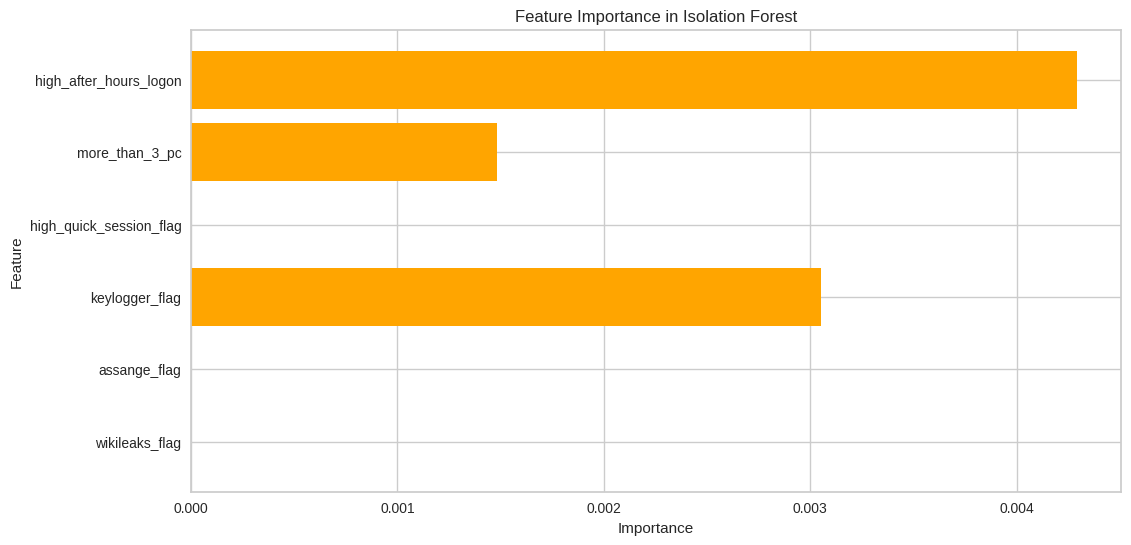

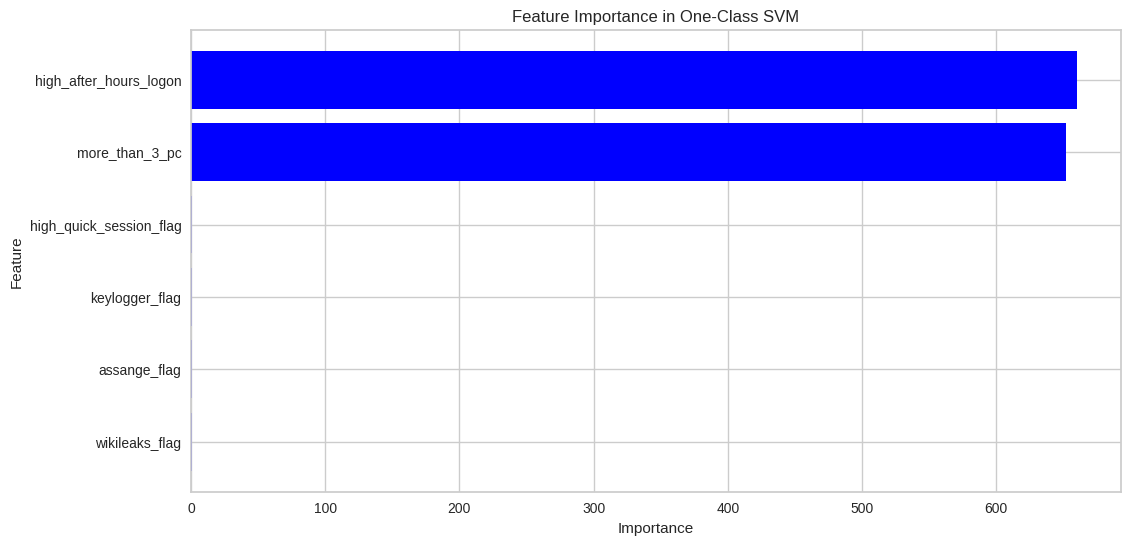

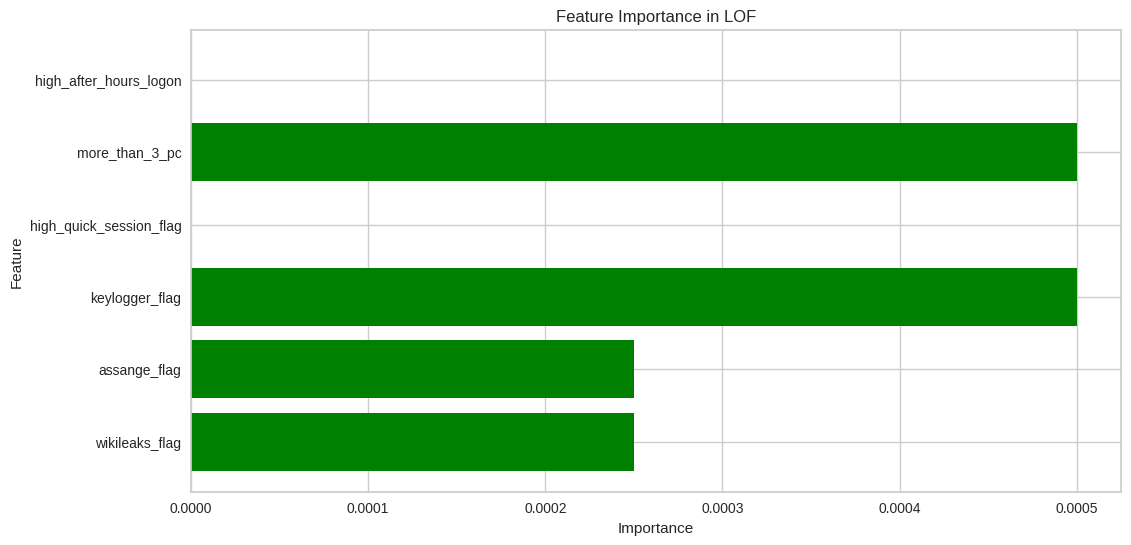

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming you have feature importance for Isolation Forest, One-Class SVM, and LOF
feature_importance_iforest = np.array([0.0, 0.0, 0.00305017, 0.0, 0.00148243, 0.0042912])  # Replace with your actual values
feature_importance_ocsvm = np.array([1.0, 1.0, 1.0, 1.0, 652.0, 660.0])  # Replace with your actual values
feature_importance_lof = np.array([0.00025, 0.00025, 0.0005, 0.0, 0.0005, 0.0])  # Replace with your actual values

# Assuming these are the feature names
feature_names = ['wikileaks_flag', 'assange_flag', 'keylogger_flag', 'high_quick_session_flag', 'more_than_3_pc', 'high_after_hours_logon']  # Replace with your actual feature names

# Create a DataFrame for better manipulation
df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Isolation Forest': feature_importance_iforest,
    'One-Class SVM': feature_importance_ocsvm,
    'LOF': feature_importance_lof
})

# Plotting feature importance for Isolation Forest
plt.figure(figsize=(12, 6))
plt.barh(df_feature_importance['Feature'], df_feature_importance['Isolation Forest'], color='orange')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Isolation Forest')
plt.show()

# Plotting feature importance for One-Class SVM
plt.figure(figsize=(12, 6))
plt.barh(df_feature_importance['Feature'], df_feature_importance['One-Class SVM'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in One-Class SVM')
plt.show()

# Plotting feature importance for LOF
plt.figure(figsize=(12, 6))
plt.barh(df_feature_importance['Feature'], df_feature_importance['LOF'], color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in LOF')
plt.show()


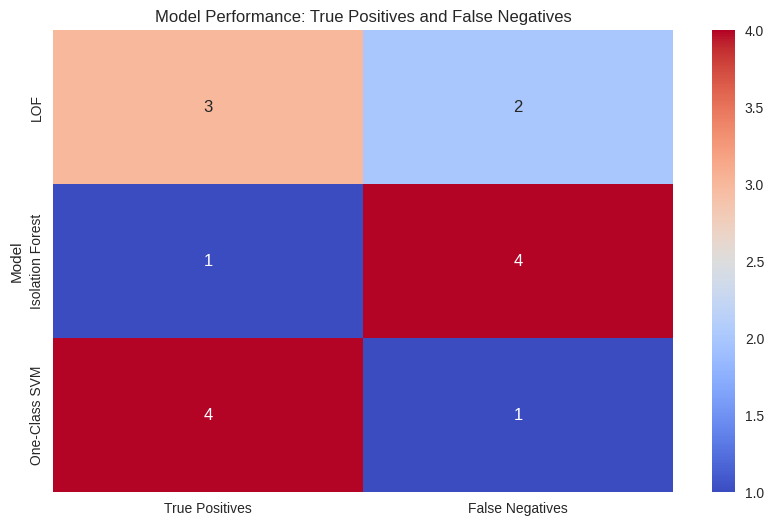

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame
data = {'Model': ['LOF', 'Isolation Forest', 'One-Class SVM'],
        'True Positives': [3, 1, 4],  # Replace with your actual counts
        'False Negatives': [2, 4, 1]}  # Replace with your actual counts

df = pd.DataFrame(data)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.set_index('Model'), annot=True, cmap='coolwarm', fmt='g')
plt.title('Model Performance: True Positives and False Negatives')
plt.show()


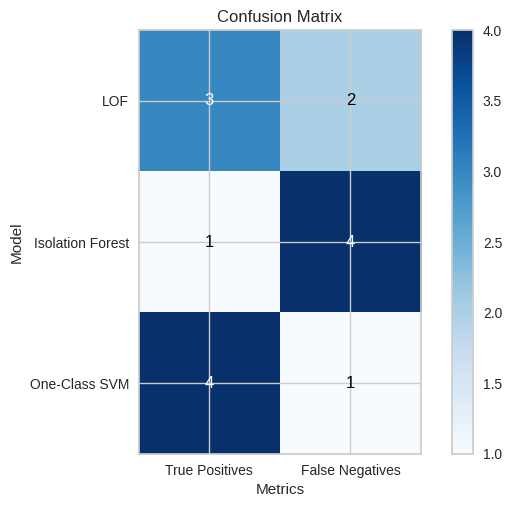

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Data
labels = ['True Positives', 'False Negatives']
LOF = [3, 2]  # Replace with your actual counts
Isolation_Forest = [1, 4]  # Replace with your actual counts
One_Class_SVM = [4, 1]  # Replace with your actual counts

# Create an array for the confusion matrix
conf_matrix = np.array([LOF, Isolation_Forest, One_Class_SVM])

# Create the plot
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(conf_matrix.shape[1]),
       yticks=np.arange(conf_matrix.shape[0]),
       xticklabels=labels, yticklabels=['LOF', 'Isolation Forest', 'One-Class SVM'],
       title='Confusion Matrix',
       ylabel='Model',
       xlabel='Metrics')

# Loop over data dimensions and create text annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, format(conf_matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > conf_matrix.max() / 2. else "black")

plt.show()
